In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('frmgham2.csv')

In [4]:
data.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [6]:
data.describe()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1.162700e+04,11627.000000,11218.000000,11627.000000,11627.000000,11627.000000,11627.000000,11548.000000,11575.000000,11627.000000,...,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000
mean,5.004741e+06,1.568074,241.162418,54.792810,136.324116,83.037757,0.432528,8.250346,25.877349,0.045584,...,0.249333,0.743270,7241.556893,7593.846736,7543.036725,7008.153608,7660.880021,7166.082996,7854.102950,3598.956395
std,2.900877e+06,0.495366,45.368030,9.564299,22.798625,11.660144,0.495448,12.186888,4.102640,0.208589,...,0.432646,0.436848,2477.780010,2136.730285,2192.120311,2641.344513,2011.077091,2541.668477,1788.369623,3464.164659
min,2.448000e+03,1.000000,107.000000,32.000000,83.500000,30.000000,0.000000,0.000000,14.430000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,2.474378e+06,1.000000,210.000000,48.000000,120.000000,75.000000,0.000000,0.000000,23.095000,0.000000,...,0.000000,0.000000,6224.000000,7212.000000,7049.500000,5598.500000,7295.000000,6004.000000,7797.500000,0.000000
50%,5.006008e+06,2.000000,238.000000,54.000000,132.000000,82.000000,0.000000,0.000000,25.480000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2429.000000
75%,7.472730e+06,2.000000,268.000000,62.000000,149.000000,90.000000,1.000000,20.000000,28.070000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7329.000000
max,9.999312e+06,2.000000,696.000000,81.000000,295.000000,150.000000,1.000000,90.000000,56.800000,1.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.14, random_state=0)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('./heart_study_train.csv')
test_data.to_csv('./heart_study_test.csv')

/opt/anaconda3/envs/ML-Bootcamp/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/ML-Bootcamp/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='CVD', ylabel='AGE'>

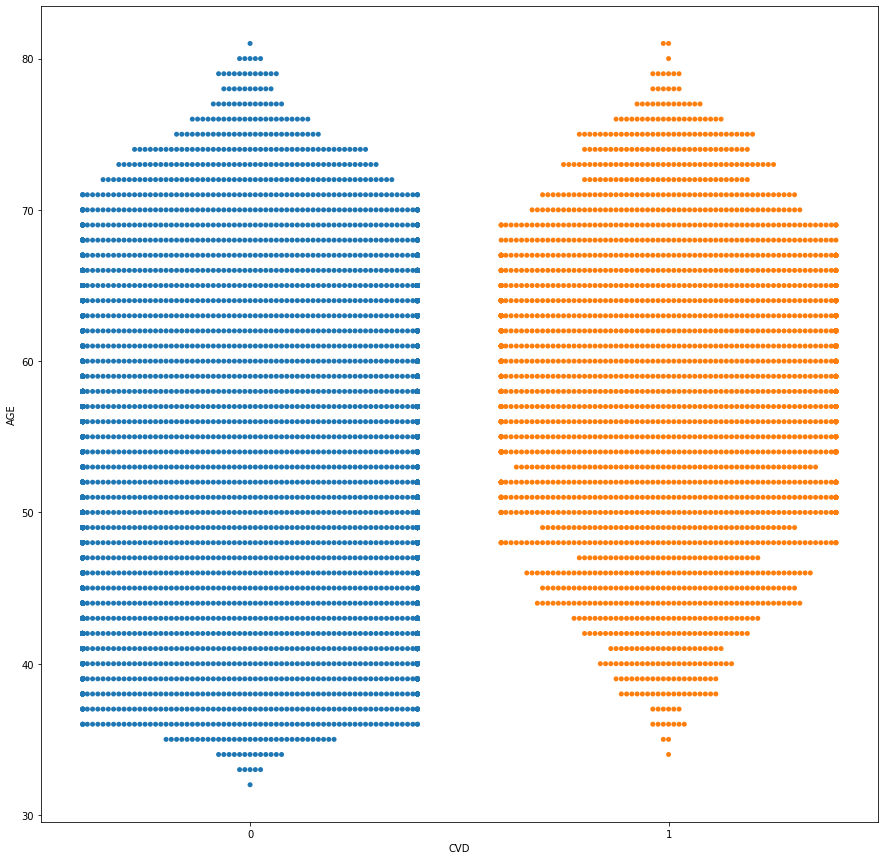

In [20]:
# age vs CHD
plt.figure(figsize=(15,15))
sns.swarmplot(x='CVD', y='AGE', data=train_data)

<AxesSubplot:xlabel='CVD', ylabel='AGE'>

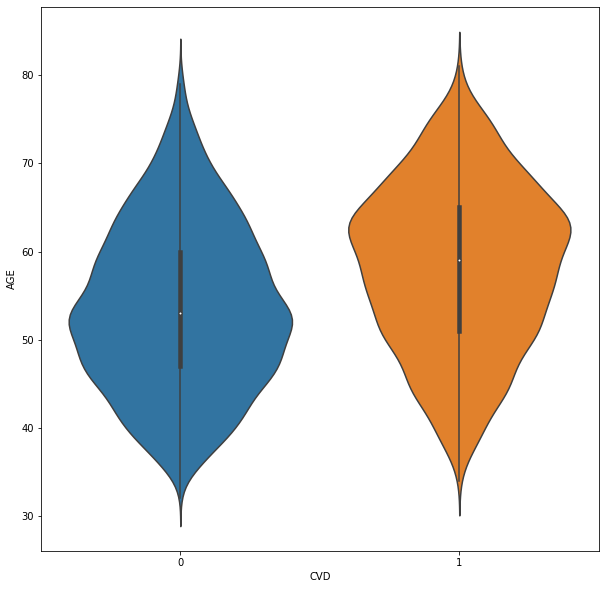

In [21]:
plt.figure(figsize=(10,10))
sns.violinplot(x='CVD', y='AGE', data=train_data)

/opt/anaconda3/envs/ML-Bootcamp/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 75.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/ML-Bootcamp/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='CVD', ylabel='AGE'>

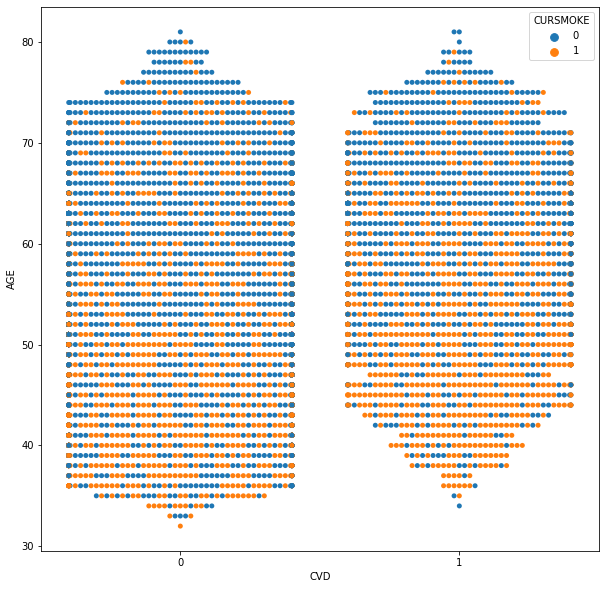

In [22]:
# age vs CHD for smokers or non-smoker
plt.figure(figsize=(10,10))
sns.swarmplot(x='CVD', y='AGE', data=train_data, hue='CURSMOKE')

<AxesSubplot:xlabel='CVD', ylabel='AGE'>

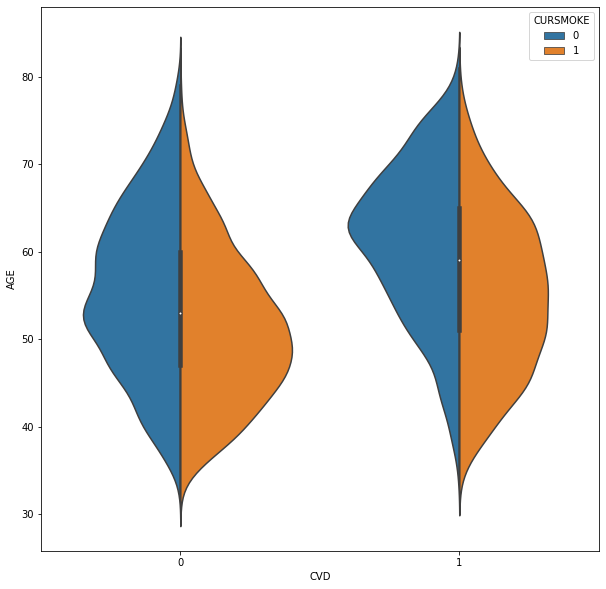

In [23]:
plt.figure(figsize=(10,10))
sns.violinplot(x='CVD', y='AGE', data=train_data, hue='CURSMOKE', split=True)

In [24]:
train_data.iloc[:,:5]

,RANDID,SEX,TOTCHOL,AGE,SYSBP
10974,9410743,1,305.0,46,120.0
10447,9027165,2,257.0,44,129.0
4629,3949730,2,170.0,35,110.0
10035,8698117,1,273.0,48,140.0
5275,4532027,1,305.0,47,122.0
...,...,...,...,...,...
4859,4162382,2,242.0,65,152.0
3264,2823814,2,212.0,70,142.0
9845,8520122,1,253.0,45,129.5
10799,9291404,1,219.0,51,125.0


<Figure size 1440x1080 with 0 Axes>

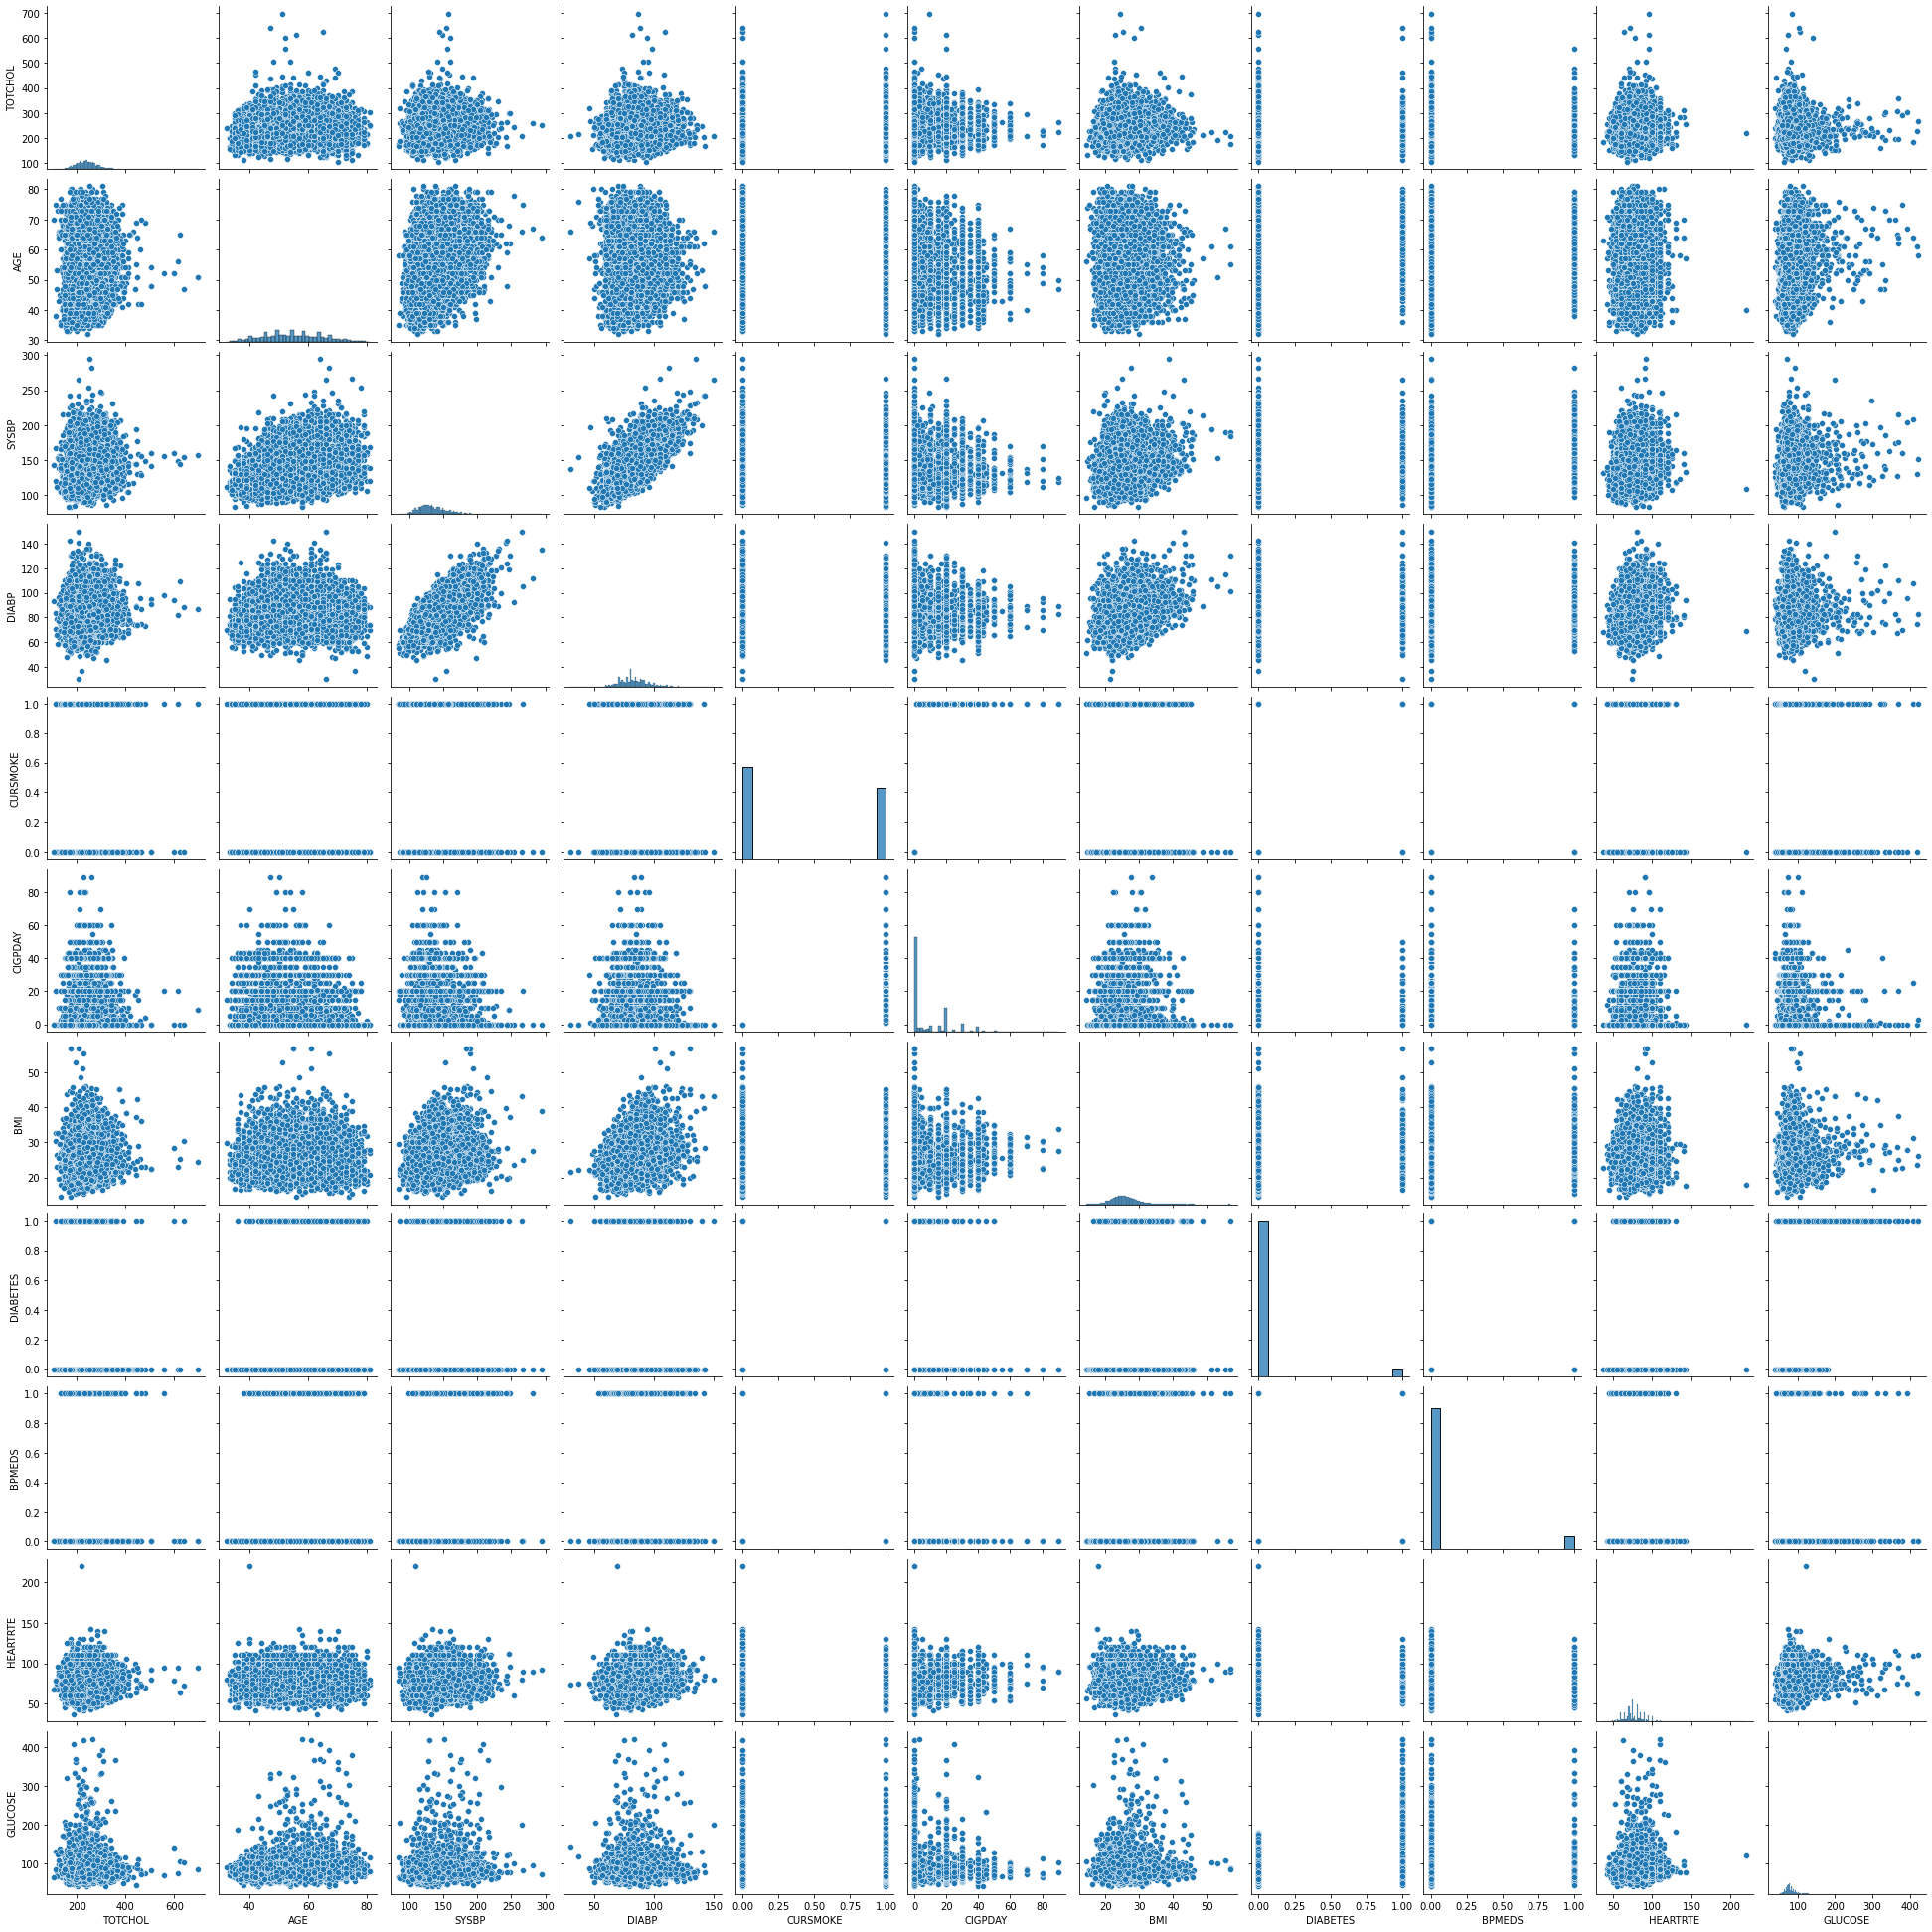

In [25]:
plt.figure(figsize=(20,15))
sns.pairplot(train_data.loc[:,'TOTCHOL': 'GLUCOSE'])

NameError: name 'df' is not defined

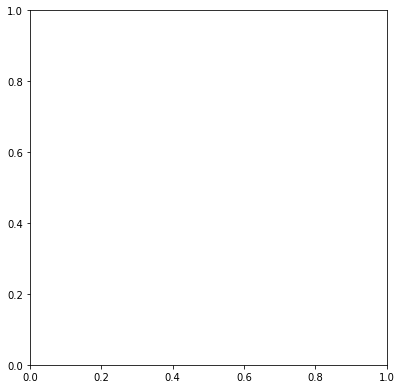

In [26]:
plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(df['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(df['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(df['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(df['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(df['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(df['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

In [27]:
missing_values_count = train_data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_percent = (missing_values_count * 100) / (train_data.shape[0])

print(max(missing_values_percent))

74.2974297429743


In [28]:
print(missing_values_count)

TOTCHOL      345
CIGPDAY       69
BMI           43
BPMEDS       510
HEARTRTE       4
GLUCOSE     1245
educ         256
HDLC        7428
LDLC        7429
dtype: int64


In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [30]:
new_train_data = pd.DataFrame(imputer.fit_transform(train_data))
new_train_data.columns = train_data.columns
new_train_data.index = train_data.index

In [31]:
train_data.isnull().sum()

RANDID         0
SEX            0
TOTCHOL      345
AGE            0
SYSBP          0
DIABP          0
CURSMOKE       0
CIGPDAY       69
BMI           43
DIABETES       0
BPMEDS       510
HEARTRTE       4
GLUCOSE     1245
educ         256
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
TIME           0
PERIOD         0
HDLC        7428
LDLC        7429
DEATH          0
ANGINA         0
HOSPMI         0
MI_FCHD        0
ANYCHD         0
STROKE         0
CVD            0
HYPERTEN       0
TIMEAP         0
TIMEMI         0
TIMEMIFC       0
TIMECHD        0
TIMESTRK       0
TIMECVD        0
TIMEDTH        0
TIMEHYP        0
dtype: int64

In [32]:
new_train_data.isnull().sum()

RANDID      0
SEX         0
TOTCHOL     0
AGE         0
SYSBP       0
DIABP       0
CURSMOKE    0
CIGPDAY     0
BMI         0
DIABETES    0
BPMEDS      0
HEARTRTE    0
GLUCOSE     0
educ        0
PREVCHD     0
PREVAP      0
PREVMI      0
PREVSTRK    0
PREVHYP     0
TIME        0
PERIOD      0
HDLC        0
LDLC        0
DEATH       0
ANGINA      0
HOSPMI      0
MI_FCHD     0
ANYCHD      0
STROKE      0
CVD         0
HYPERTEN    0
TIMEAP      0
TIMEMI      0
TIMEMIFC    0
TIMECHD     0
TIMESTRK    0
TIMECVD     0
TIMEDTH     0
TIMEHYP     0
dtype: int64

In [33]:
new_train_data.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
10974,9410743.0,1.0,305.0,46.0,120.0,72.0,1.0,20.0,26.34,0.0,...,1.0,0.0,7961.0,5437.0,5437.0,5437.0,8766.0,5437.0,8766.0,8766.0
10447,9027165.0,2.0,257.0,44.0,129.0,93.0,0.0,0.0,27.56,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,2257.0
4629,3949730.0,2.0,170.0,35.0,110.0,69.0,0.0,0.0,23.48,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
10035,8698117.0,1.0,273.0,48.0,140.0,90.0,0.0,0.0,27.48,0.0,...,1.0,1.0,5622.0,3703.0,3703.0,3703.0,3708.0,3703.0,8766.0,0.0
5275,4532027.0,1.0,305.0,47.0,122.0,78.0,1.0,30.0,20.36,0.0,...,0.0,0.0,6438.0,6438.0,6438.0,6438.0,6438.0,6438.0,6438.0,6438.0


In [34]:
train_data = new_train_data.copy()

In [35]:
print('Number of training examples to be deleted for outliers removal is ',len(train_data[train_data['SYSBP'] > 220]) + len(train_data[train_data['BMI'] > 43]) + len(
    train_data[train_data['HEARTRTE'] > 125]) + len(train_data[train_data['GLUCOSE'] > 200]) + len(
    train_data[train_data['HEARTRTE'] > 450]))

Number of training examples to be deleted for outliers removal is  126


In [36]:
train_data = train_data[~(train_data['SYSBP'] > 220)]
train_data = train_data[~(train_data['BMI'] > 43)]
train_data = train_data[~(train_data['HEARTRTE'] > 125)]
train_data = train_data[~(train_data['GLUCOSE'] > 200)]
train_data = train_data[~(train_data['TOTCHOL'] > 450)]
print(train_data.shape)

(9863, 39)


/opt/anaconda3/envs/ML-Bootcamp/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/ML-Bootcamp/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/ML-Bootcamp/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

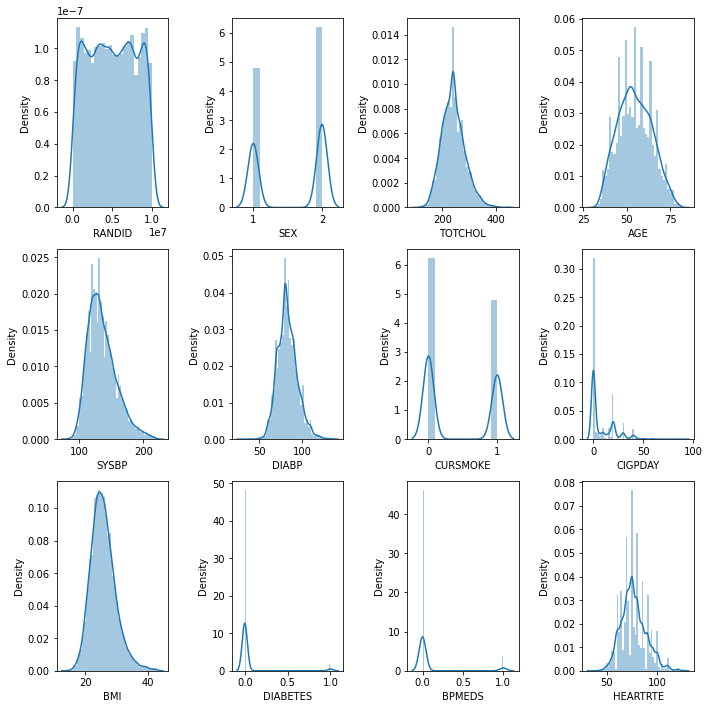

In [37]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in train_data.items():
    sns.distplot(v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

In [38]:
# Standardise some features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_standardise = ['AGE','TOTCHOL','SYSBP','BMI', 'HEARTRTE', 'GLUCOSE', 'CIGPDAY']
train_data[cols_to_standardise] = scaler.fit_transform(train_data[cols_to_standardise])

In [39]:
# imputing missing values if any
imputer = SimpleImputer(strategy='most_frequent')
new_test_data = pd.DataFrame(imputer.fit_transform(test_data))
new_test_data.columns = test_data.columns
new_test_data.index = test_data.index

test_data = new_test_data.copy()

In [40]:
# Standardising features
scaler = StandardScaler()
test_data[cols_to_standardise] = scaler.fit_transform(test_data[cols_to_standardise])

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [42]:
X_train = train_data.loc[:,train_data.columns != 'CVD']
y_train = train_data.loc[:,'CVD']
X_test = test_data.loc[:, test_data.columns !='CVD']
y_test = test_data.loc[:, 'CVD']

In [43]:
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


/opt/anaconda3/envs/ML-Bootcamp/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
log_reg_accuracy = accuracy_score(y_pred_log, y_test) * 100
print('Accuracy Score for logistic regression is %f'%log_reg_accuracy)


Accuracy Score for logistic regression is 94.840295


In [46]:
log_train_score = log_reg.score(X_train, y_train) * 100
print('Train score for Logistic Regression is %f'%log_train_score)

Train score for Logistic Regression is 94.707493


In [47]:
print('Difference between train and test score for Logistic Regression is %f'%(log_train_score - log_reg_accuracy))

Difference between train and test score for Logistic Regression is -0.132802


In [48]:
confusion_matrix(y_pred_log, y_test)

array([[1216,   66],
       [  18,  328]])

<AxesSubplot:>

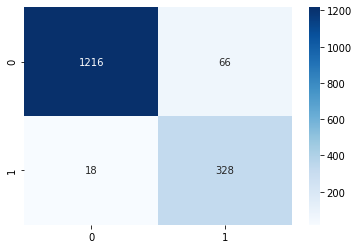

In [49]:
sns.heatmap(confusion_matrix(y_pred_log, y_test), annot=True, cmap='Blues', fmt='d')

In [50]:
print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1282
         1.0       0.83      0.95      0.89       346

    accuracy                           0.95      1628
   macro avg       0.91      0.95      0.93      1628
weighted avg       0.95      0.95      0.95      1628



In [51]:
history=log_reg.fit(X_train,y_train)

/opt/anaconda3/envs/ML-Bootcamp/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(accuracy_legend)
plt.title('Training and Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy %")

AttributeError: 'LogisticRegression' object has no attribute 'history'

In [53]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

#log_prob = log_reg.predict_proba(x_test)
log_prob_cw = log_reg_cw.predict_proba(x_test)
log_prob_up = est_reg.predict_proba(x_test)

#fpr, tpr, _ = roc_curve(y_test, log_prob[:,1])
fpr_cw, tpr_cw, _ = roc_curve(y_test, log_prob_cw[:,1])
fpr_up, tpr_up, _ = roc_curve(y_test, log_prob_up[:,1])

#log_roc_auc = auc(fpr, tpr)
log_cw_roc_auc = auc(fpr_cw, tpr_cw)
log_up_roc_auc = auc(fpr_up, tpr_up)

plt.figure(figsize=(10,7))

#plt.plot(fpr, tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_roc_auc)
plt.plot(fpr_cw, tpr_cw, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_cw_roc_auc)
plt.plot(fpr_up, tpr_up, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg. (Post Upsamp.)) = %0.4f'% log_up_roc_auc)

plt.plot([0,1], 'grey', lw=2, linestyle='-.')

plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic - Area Under Curve (ROC-AUC)')

NameError: name 'log_reg_cw' is not defined

In [54]:
#LOGISTIC REGRESSION CONCLUDED

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt_clf = DecisionTreeClassifier(min_samples_split=40, random_state=0) 
# that fraction of samples(if float) or that many number(if int) of samples is atleast present in the node 
# before splitting, then only split that node

# for min_samples_split as 180 I got a better accuracy and train score and difference was less
# but f1 score was very bad for positive class
# and setting min_samples_split as 40, we got good results for all metrics

In [57]:
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [58]:
dt_accuracy = accuracy_score(y_pred_dt, y_test)*100
print('Accuracy score for Decision tree is %f'%dt_accuracy)

Accuracy score for Decision tree is 99.754300


In [59]:
dt_train_score = dt_clf.score(X_train, y_train)*100
print('Train score for Decision tree is %f'%dt_train_score)

Train score for Decision tree is 99.817500


In [60]:
print('Difference between train and test scores for Decision tree is : %f'%(dt_train_score - dt_accuracy))

Difference between train and test scores for Decision tree is : 0.063200


In [61]:
confusion_matrix(y_pred_dt, y_test)


array([[1232,    2],
       [   2,  392]])

<AxesSubplot:>

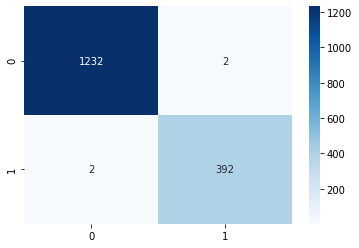

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='d')

In [63]:
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1234
         1.0       0.99      0.99      0.99       394

    accuracy                           1.00      1628
   macro avg       1.00      1.00      1.00      1628
weighted avg       1.00      1.00      1.00      1628



In [64]:
# Exporting the tree in text format
from sklearn.tree import export_text
dt_text_format = export_text(dt_clf, feature_names=list(train_data.columns[:38]))
print('Decision tree in text format : \n%s'%dt_text_format)


Decision tree in text format : 
|--- TIMESTRK <= 8712.00
|   |--- ANYCHD <= 0.50
|   |   |--- STROKE <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- STROKE >  0.50
|   |   |   |--- class: 1.0
|   |--- ANYCHD >  0.50
|   |   |--- MI_FCHD <= 0.50
|   |   |   |--- TIMECVD <= 8635.50
|   |   |   |   |--- ANGINA <= 0.50
|   |   |   |   |   |--- TIMESTRK <= 7627.50
|   |   |   |   |   |   |--- TOTCHOL <= 2.17
|   |   |   |   |   |   |   |--- LDLC <= 226.50
|   |   |   |   |   |   |   |   |--- BMI <= 3.14
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- BMI >  3.14
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- LDLC >  226.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- TOTCHOL >  2.17
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- TIMESTRK >  7627.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- ANGINA >  0.50
|   |   |   |   |   |--- STROKE <= 0

In [65]:
#DECISION TREE CONCLUDED

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_clf = RandomForestClassifier(n_estimators = 150,min_samples_split=10,random_state=0)

In [68]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [69]:
rf_accuracy = accuracy_score(y_pred_rf, y_test)*100
print('Accuracy score for Random Forest is %f'%rf_accuracy)

Accuracy score for Random Forest is 99.631450


In [70]:
rf_train_score = rf_clf.score(X_train, y_train)*100
print('Train score for Random Forest is %f'%rf_train_score)


Train score for Random Forest is 99.939167


In [71]:
print('Difference between train and test scores for Random Forest is : %f'%(rf_train_score - rf_accuracy))

Difference between train and test scores for Random Forest is : 0.307717


In [72]:
confusion_matrix(y_pred_rf, y_test)

array([[1228,    0],
       [   6,  394]])

<AxesSubplot:>

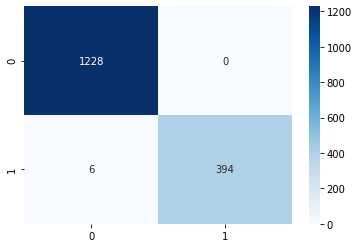

In [73]:
sns.heatmap(confusion_matrix(y_pred_rf, y_test), annot=True, cmap='Blues', fmt = 'd')

In [74]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1228
         1.0       1.00      0.98      0.99       400

    accuracy                           1.00      1628
   macro avg       1.00      0.99      1.00      1628
weighted avg       1.00      1.00      1.00      1628

